In [354]:
from sklearn.cluster import DBSCAN
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [356]:
df = pd.read_csv(r"C:\Users\yetta\OneDrive\Desktop\Wholesale customers data.csv")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [358]:
df.duplicated().sum()

0

In [360]:



df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

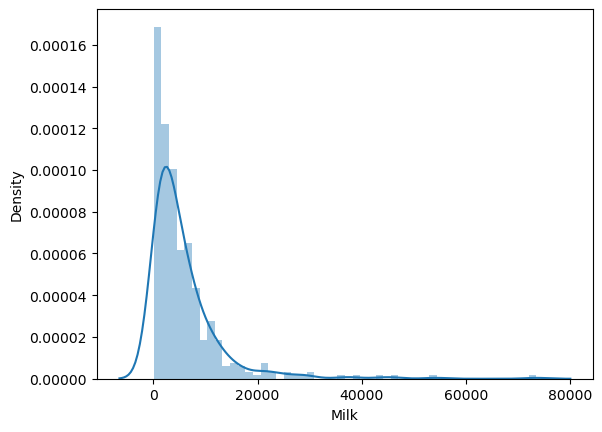

In [362]:
sns.distplot(df['Milk'])
plt.show()





In [363]:
import seaborn as sns
import matplotlib.pyplot as plt


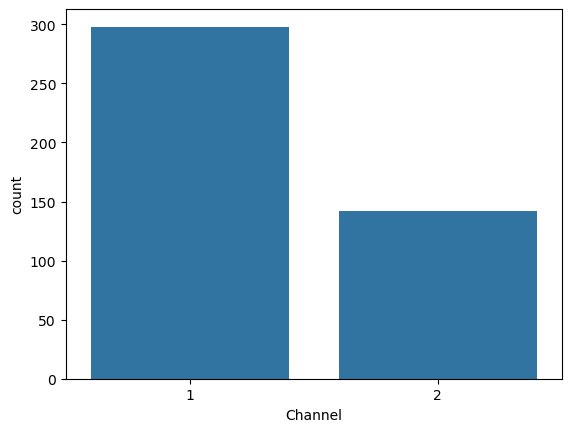

In [366]:
sns.countplot(x=df['Channel'])
plt.show()

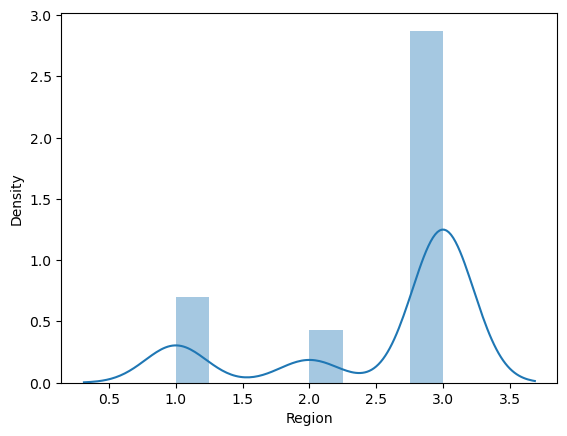

In [368]:
sns.distplot(df['Region'])
plt.show()


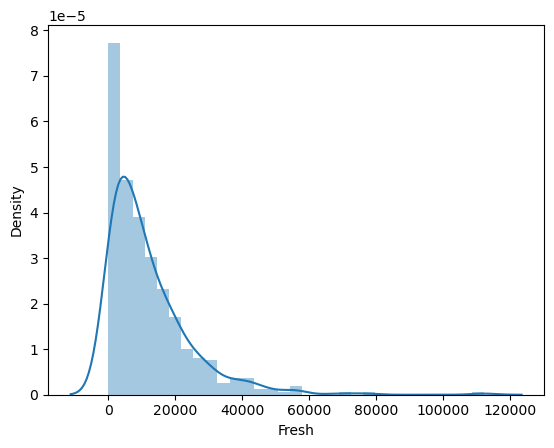

In [370]:
sns.distplot(df['Fresh'])
plt.show()


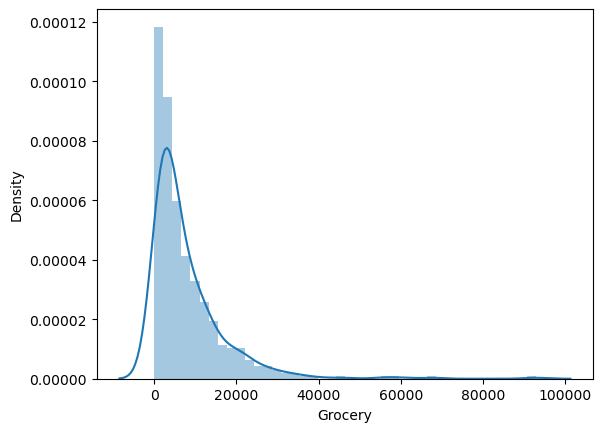

In [372]:
sns.distplot(df['Grocery'])
plt.show()

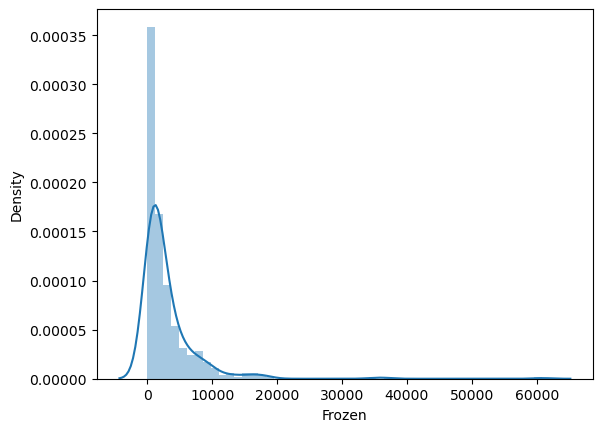

In [374]:
sns.distplot(df['Frozen'])
plt.show()

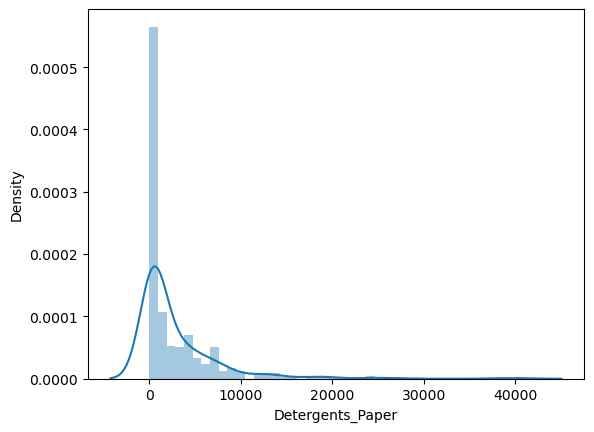

In [376]:
sns.distplot(df['Detergents_Paper'])
plt.show()

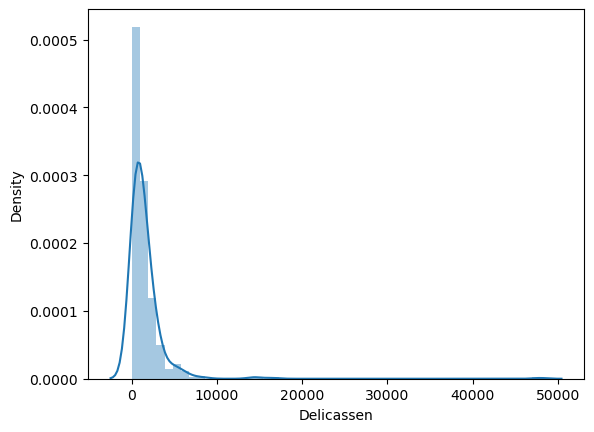

In [378]:
sns.distplot(df['Delicassen'])
plt.show()

In [380]:
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [382]:
data =pd.DataFrame(df)

In [384]:
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [386]:
df.drop(['Channel','Region'],axis=1,inplace=True)

In [388]:
 from sklearn.preprocessing import StandardScaler
stscaler = StandardScaler()
X=stscaler.fit_transform(df)

In [390]:
X

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

In [392]:
import scipy.cluster.hierarchy as sch

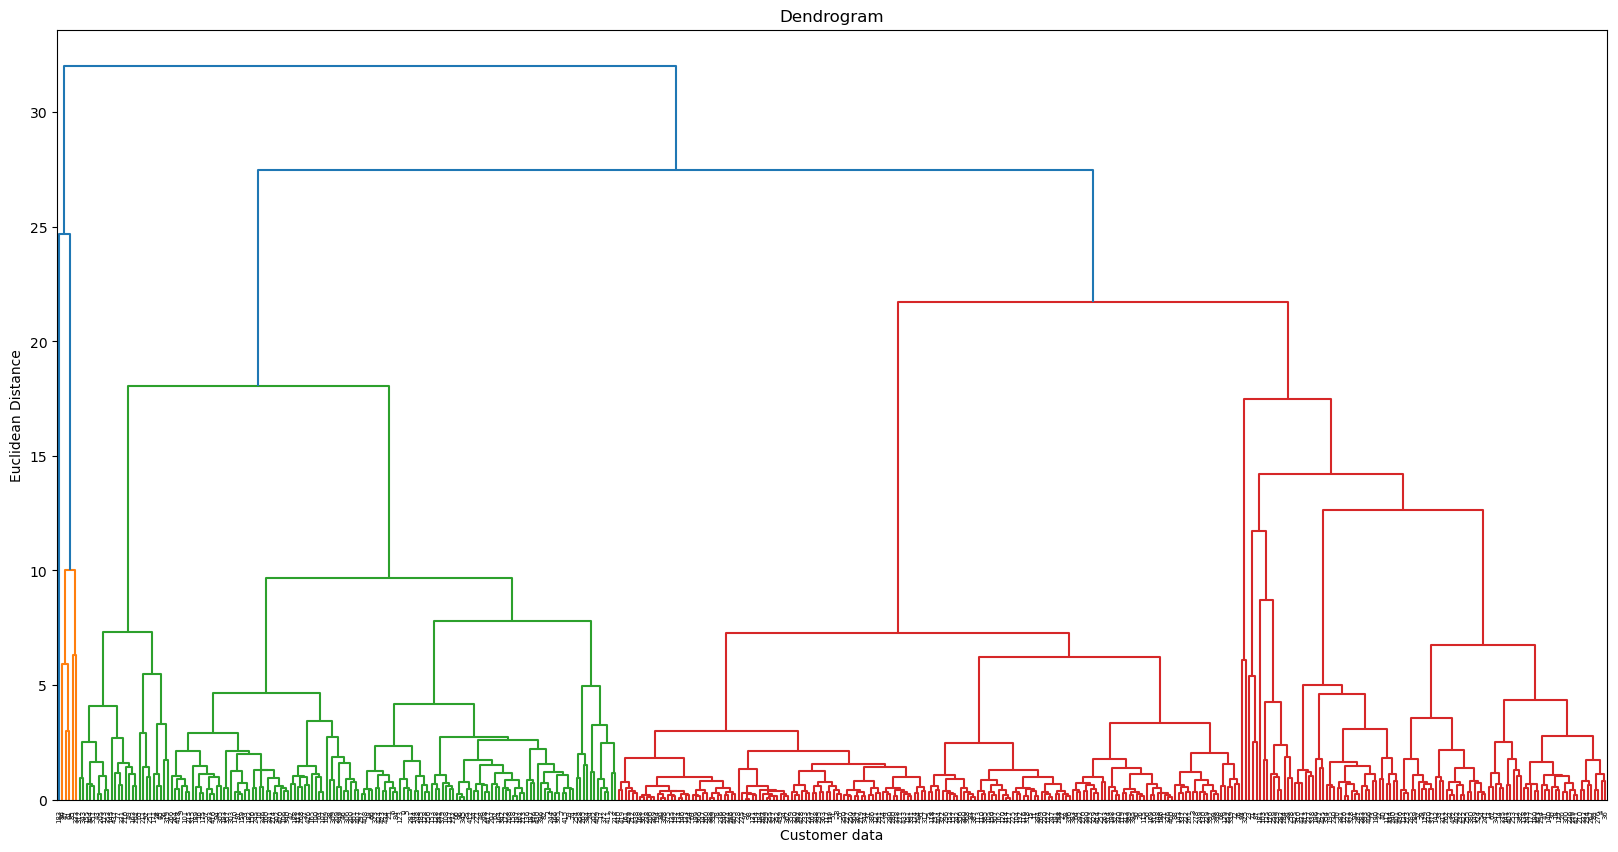

In [394]:
plt.figure(figsize=(20, 10))  # Adjusted figsize for better visibility
dendo = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customer data')
plt.ylabel('Euclidean Distance')
plt.show()

In [395]:
len(set(dendo['color_list']))-1

3

In [396]:
from sklearn.cluster import AgglomerativeClustering

In [397]:
model=AgglomerativeClustering(n_clusters=3)
culster=model.fit_predict(X)

In [398]:
culster

array([2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2,
       2, 2, 2, 0, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 0, 2, 2, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 0, 0, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2,
       1, 1, 2, 1, 1, 1, 2, 0, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1,

In [399]:
type(culster)

numpy.ndarray

In [400]:
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


In [401]:
group_num=pd.DataFrame(culster,columns=['Group'])

In [402]:
group_num

,Group
0,2
1,2
2,2
3,1
4,1
...,...
435,1
436,1
437,2
438,1


In [403]:
cust_group_data=pd.concat([df,group_num],axis=1)

In [404]:
cust_group_data

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Group
0,12669,9656,7561,214,2674,1338,2
1,7057,9810,9568,1762,3293,1776,2
2,6353,8808,7684,2405,3516,7844,2
3,13265,1196,4221,6404,507,1788,1
4,22615,5410,7198,3915,1777,5185,1
...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,1
436,39228,1431,764,4510,93,2346,1
437,14531,15488,30243,437,14841,1867,2
438,10290,1981,2232,1038,168,2125,1


In [405]:
from sklearn.metrics import silhouette_score


In [406]:
silhouette_score(X,culster)


0.2646091480214908

In [407]:
from sklearn.cluster import KMeans

wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

print

<function print(*args, sep=' ', end='\n', file=None, flush=False)>

In [408]:
wcss

[2266.955266583245,
 1644.059851234756,
 1326.6746082135533,
 1070.2551995135616,
 989.3326418885057,
 856.7070228388114,
 791.8280762163155,
 710.1943394067517,
 668.22250548469]

In [409]:
type(wcss)

list

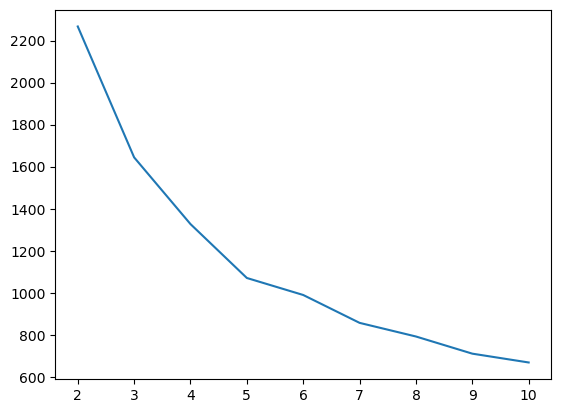

In [413]:
plt.plot(range(2,11),wcss)
plt.show()

In [417]:
model=KMeans(n_culster=4,random_state=18)
group=model.fit_predict(X)
groups


TypeError: KMeans.__init__() got an unexpected keyword argument 'n_culster'